## Random graph generation with constraints
* A water molecule can donate at most 2 hydrogen bonds (two outgoing edges)
* A water molecule can accept at most 2 hydrogen bonds (two incoming edges)
* A water molecule cannot hydrogen bond with itself (no self-loops)
* A water molecule cannot both donate and accept hydrogen bonds from a single other water molecule

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from utils import metrics
from utils import randomg
from multiprocessing import Pool

### Generate a random constrained graph with N water molecules

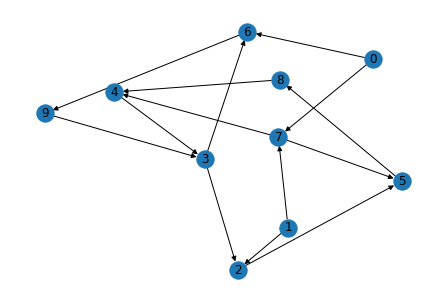

In [3]:
n_waters = 10

G=randomg.generate_random_graph(n_waters, bidirectional=False)

nx.draw_spring(G, with_labels = True)

### Relax graph

TTM relaxed energy: -87.902227 kcal/mol
Isomorphic to initial random graph? False


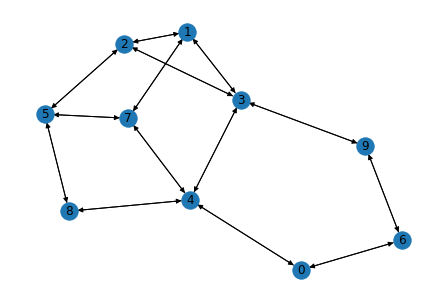

In [4]:
Gr = randomg.graph_relaxation(G)
print(f"TTM relaxed energy: {Gr.graph['energy']:0.6f} kcal/mol")
print(f"Isomorphic to initial random graph? {nx.is_isomorphic(G, Gr)}")

nx.draw_spring(Gr, with_labels = True)

### Compute graph metrics

In [5]:
labels= ['trimers', 'tetramers', 'pentamers', 'hexamers', 'shortest_path', 'wiener']
results={labels[i]: val for i, val in enumerate(metrics.compute_metrics(Gr))}
results['graph']=G
results

{'trimers': 1.0,
 'tetramers': 3.0,
 'pentamers': 3.0,
 'hexamers': 0.0,
 'shortest_path': 1.9777777777777779,
 'wiener': 89.0,
 'graph': <networkx.classes.digraph.DiGraph at 0x2b8b9bb28670>}

### Generate large random sample and compute metrics

In [6]:
n_samples = 100

with Pool(12) as p:
    results = p.map(randomg.generate_relaxed_sample, [n_waters]*n_samples)

In [7]:
df = pd.DataFrame(results)
df['class']='random_relaxed'
#df.to_pickle('data/random_generation.pkl.gz')
df.head()

,trimers,tetramers,pentamers,hexamers,shortest_path,wiener,graph,class
0,0.0,7.0,0.0,4.0,1.977778,89.0,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",random_relaxed
1,2.0,5.0,1.0,0.0,1.933333,87.0,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",random_relaxed
2,0.0,2.0,0.0,0.0,2.933333,132.0,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",random_relaxed
3,0.0,7.0,1.0,0.0,2.022222,91.0,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",random_relaxed
4,1.0,6.0,3.0,0.0,1.911111,86.0,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",random_relaxed


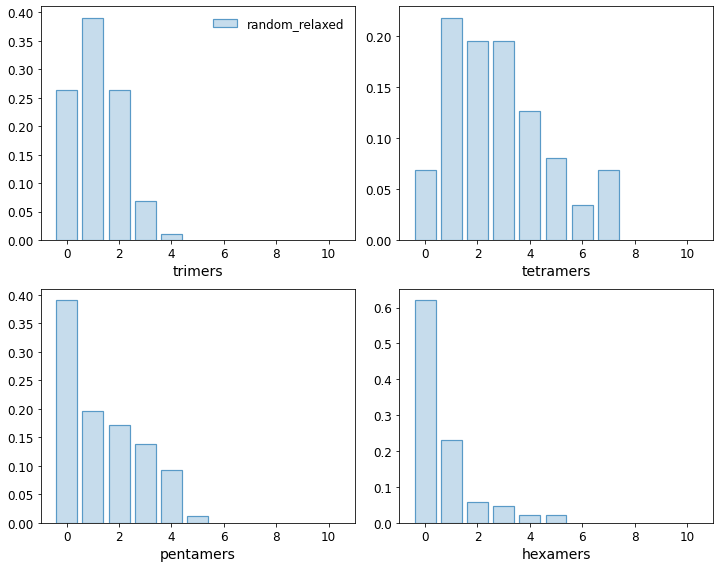

In [9]:
fig,(axt,axb)=plt.subplots(2, 2, figsize=(10,8))

for i,ax in enumerate([axt[0],axt[1],axb[0],axb[1]]):
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_ylabel('')
    ax.set_xlabel(df.columns[i], fontsize=14)
    ax.set_xlim(-1,11)
    
    
    inside_color=['#C6DCEC','#FFDEC2','#CAE7CA']
    edge_color=['#599AC7','#FF8F2D','#47AC47']
    
    for l,lab in enumerate(df['class'].value_counts().index):
        x=df.loc[(df.shortest_path>0)&(df['class']==lab)][df.columns[i]].value_counts(normalize=True).index
        y=df.loc[(df.shortest_path>0)&(df['class']==lab)][df.columns[i]].value_counts(normalize=True).values

        ax.bar(x=x, height=y,  color=inside_color[l], alpha=1-(l/8), width= 0.8-(l/4), 
               edgecolor=edge_color[l], linewidth=1.2, label=lab)
        
axt[0].legend(fontsize=12, frameon=False, loc='upper right')    
plt.tight_layout()
plt.show()